In [1]:
'''Author: Olivia McAuley'''

import numpy as np
from numpy import linspace
import seaborn as sb
import scipy as sc
from scipy import stats

import astropy
from astropy import units as u

import galpy
import galpy.df
from galpy.orbit import Orbit
from galpy.util import conversion
from galpy.util.plot import dens2d, scatterplot
from galpy.potential import evaluatePotentials, plotRotcurve, plotPotentials, lindbladR, vcirc, epifreq, MWPotential2014,SoftenedNeedleBarPotential, DehnenSmoothWrapperPotential
from galpy.potential import to_amuse

from matplotlib.pyplot import *
from matplotlib import pyplot as plt
plt.rc('text', usetex=False)
plt.rc('font', **{'family':'Computer Modern','size':20})
plt.rc('axes', labelsize=12)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
import matplotlib.colors as colors
from matplotlib import colors as mc
from matplotlib import cm
from matplotlib.colors import LogNorm
%matplotlib inline
from matplotlib import mlab as ml
import matplotlib.animation as manimation
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

import itertools

# from amuse.lab import *
# from amuse.couple import bridge
# from amuse.datamodel import Particles
# from galpy.util import plot

In [2]:
##### Load in action angles files #####

# simname = 'GrowBar_CR4'
nitir = 40
simname = 'Bar_Disk_Plummer'
nsample = 1000     # number of samples
nbatch = 10       # number of batches of nsample orbits
dpType = 'MW14'
AAType = 'stklAA'
# dfType = 'N_qiDF_'
dfType = 'N_ppDF_'

action0 = np.load('./orbits/Cluster/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_actions_'+str(simname)+'_'+str(0)+'.npy')
# action1 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_actions_'+str(simname)+'_'+str(1)+'.npy')
# action2 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_actions_'+str(simname)+'_'+str(2)+'.npy')
# action3 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_actions_'+str(simname)+'_'+str(3)+'.npy')

##### Load in cylindrical coordinates files #####

cylcoord0 = np.load('./orbits/Cluster/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cyl_'+str(simname)+'_'+str(0)+'.npy')
# cylcoord1 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cyl_'+str(simname)+'_'+str(1)+'.npy')
# cylcoord2 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cyl_'+str(simname)+'_'+str(2)+'.npy')
# cylcoord3 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cyl_'+str(simname)+'_'+str(3)+'.npy')

##### Load in cartesial coordinates files #####

cartcoord0 = np.load('./orbits/Cluster/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cart_'+str(simname)+'_'+str(0)+'.npy')
# cartcoord1 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cart_'+str(simname)+'_'+str(1)+'.npy')
# cartcoord2 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cart_'+str(simname)+'_'+str(2)+'.npy')
# cartcoord3 = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+dfType+dpType+'p_'+AAType+'_orbits_cart_'+str(simname)+'_'+str(3)+'.npy')

# EJ = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+'N_qiDF_'+dpType+'p_'+AAType+'_jacobi_energy_'+str(simname)+'_'+str(0)+'.npy')
# EJ = EJ[0,:]

# Lz = np.load('./orbits/'+str(simname)+'/'+str(nsample*nbatch)+'N_qiDF_'+dpType+'p_'+AAType+'_angular_momentum_z_'+str(simname)+'_'+str(0)+'.npy')
# Lz = Lz[0,:]

# action = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(1-1)+'.npy')
# action1 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(2-1)+'.npy')
# action2 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(3-1)+'.npy')
# action3 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(4-1)+'.npy')
# action4 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(5-1)+'.npy')
# action5 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(6-1)+'.npy')
# action6 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(7-1)+'.npy')
# action7 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(8-1)+'.npy')
# action8 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(9-1)+'.npy')
# action9 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(10-1)+'.npy')
# action10 = np.load('./orbits/'+str(total_orbits)+'N_qiDF_'+'MW14'+'p_'+'stklAA'+'_actions_NoBar'+str(11-1)+'.npy')


print (action0.shape)
print (cylcoord0.shape)
# print (EJ.shape)

(6, 10000)
(6, 10000, 40)


In [3]:
ro = 8 #kpc scale radii
vo = 200 #km/s

x0 = cartcoord0[0,:,:]
print ('This is the shape of x0',np.shape(x0))
print ('This is the shape of x0[0,:]',np.shape(x0[0,:]))


x0i = cartcoord0[0,:,0]
x0f = cartcoord0[0,:,-1]
# print('This is the shape of initial x0:',np.shape(x0i))
# print (ro*x0.max())

y0 = cartcoord0[1,:,:]

y0i = cartcoord0[1,:,0]
y0f =cartcoord0[1,:,-1]

z0i = cartcoord0[2,:,0]
z0f = cartcoord0[2,:,-1]


vx0i = cartcoord0[3,:,0]
vx0f = cartcoord0[3,:,-1]

vy0i = cartcoord0[4,:,0]
vy0f = cartcoord0[4,:,-1]

vz0i = cartcoord0[5,:,0]
vz0f = cartcoord0[5,:,-1]


r0i = cylcoord0[0,:,0]
r0f = cylcoord0[0,:,-1]

vr0i = cylcoord0[3,:,0]
vr0f = cylcoord0[3,:,-1]

vphii = cylcoord0[4,:,0]
vphif = cylcoord0[4,:,-1]

vz0i = cylcoord0[5,:,0]
vz0f = cylcoord0[5,:,-1]

# jrf = action0[0,:]
# jri = action0[1,:]

jrf = action0[0,:]
print ('This is shape of final radial action:',jrf.shape)
print ('This is final radial action:',jrf)
jphif = action0[1,:]
jzf = action0[2,:]
jri = action0[3,:]
print ('This is shape of initial radial action:',jri.shape)
print ('This is initial radial action:',jri)
jphii = action0[4,:]
jzi = action0[5,:]


This is the shape of x0 (10000, 40)
This is the shape of x0[0,:] (40,)
This is shape of final radial action: (10000,)
This is final radial action: [0.06833482 0.09009831 0.02609939 ... 0.00817905 0.58654901 0.11950965]
This is shape of initial radial action: (10000,)
This is initial radial action: [2.35933243e-04 6.55683706e-05 1.02064093e-04 ... 1.30006620e-04
 8.38644680e-04 1.65723568e-04]


This is x0 shape: (10000, 40)


<IPython.core.display.Javascript object>


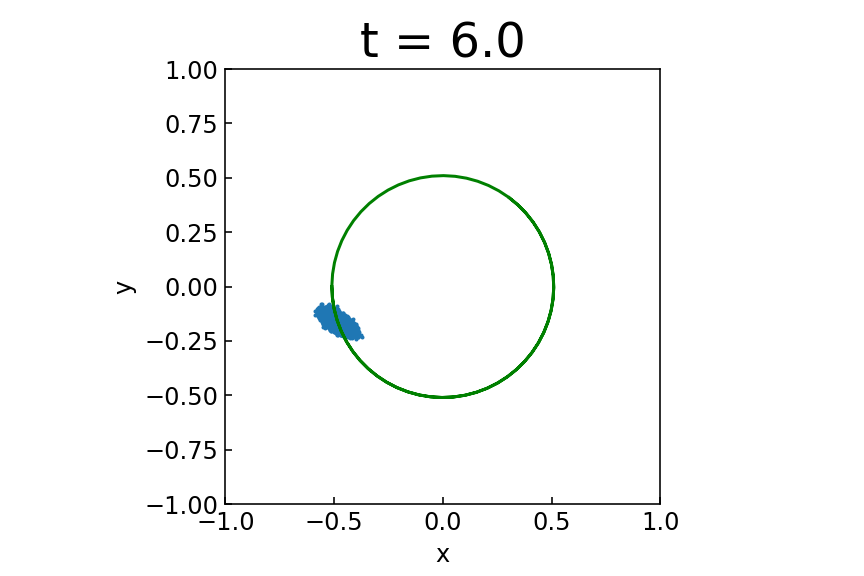

In [8]:
##### Movie of cluster over 30 total timesteps #####
##### https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot #####

%matplotlib notebook


frames = nitir #look at cell 2 for value of nitir
x = x0
print ('This is x0 shape:', np.shape(x))
y = y0

# we want each snapshot to be associated with a color in the rainbow
# colors = itertools.cycle(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
####################################

fig, ax = plt.subplots()

# plot the initial data 
s = plt.scatter(x[:,0], y[:,0],s=1) #we will iterate through the data in the update definition
####################################

# plot circles at L4 and L5 to see if stars are passing through this region
# cc5 = plt.Circle(( 0.0 , 0.5102040816326531 ), 0.1 , alpha=0.1) # circle denoting L5 position
# cc4 = plt.Circle(( 0.0 , -0.5102040816326531 ), 0.1 , alpha=0.1)# circle denoting L4 position

# ax.set_aspect( 1 ) 
# ax.add_artist( cc5 ) 
# ax.add_artist( cc4 ) 

mwp = MWPotential2014
CRo = .5 # CRo = 4 kpc
v_c = vcirc(mwp, R = CRo)# v_c in natural units and it's the v_c at corotation radius
omegabo = v_c/CRo
#     print ('This is omegabo:',omegabo)

t = np.linspace(0,200,100) #in Myr

phit = np.pi + omegabo*(vo/ro)*t*(3.241*10**-17)*(3.15576*10**13) #omega* t is now unitless
rcircle = 0.5102040816326531
xcoord = rcircle*np.cos(phit)
#     print ('This is xcoord:',xcoord)
ycoord = rcircle*np.sin(phit)

plt.gca().set_aspect('equal')

plt.plot(xcoord,ycoord,'g')
####################################

# set title and axes #####
plotTitle = ax.set_title("t=0") # we will iterate through this in the update definition
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
#####################################

# iterate through the data
def update(i):
    s.set_offsets(np.column_stack([x[:,i], y[:,i]]))
#     s.set_facecolor(next(colors))
    plotTitle.set_text(f"t = {i:.1f}")
##########################################

# use animation to show movie
ani = animation.FuncAnimation(fig, update, frames=frames)

##### Save animation as movie #####
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('ClusterwCircles.mp4', writer=writer)

In [ ]:
%matplotlib notebook

x = x0
print ('This is x0 shape:', np.shape(x))
y = y0
z = cartcoord0[2,:,:]
xmin = -0.6
xmax = 0.6
ymin = -0.6
ymax = 0.6

# for i in range(len(sx)):
#         if (sx[i]<sxmin or sx[i]>sxmax or sy[i]<symin or sy[i]>symax): # or sv[i]<svmin or sv[i]>svmax):
#             sx[i]=float("NaN")
#     is_nan = (sx[:] != sx[:])
#     sx = sx[~is_nan]
#     sy = sy[~is_nan]
#     sj = sj[~is_nan]

for i in range(len(x[:,0])):
    if (x[i,0]<xmin or x[i,0]>xmax or y[i,0]<ymin or y[i,0]>ymax):
        x[i,0]=float("NaN")
    is_nan = (x[:,0] != x[:,0])
    x = x[~is_nan]
    y = y[~is_nan]

nbins = 101
frames = nitir
normalize=colors.LogNorm()

statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(x[:,0], y[:,0], y0i, statistic='count', bins=nbins, range=[[xmin, xmax], [ymin, ymax]])

x_width = (x_edges[1]-x_edges[0])
x_centers = x_edges[1:]-x_width/2
xi = x_centers
print('This is the shape of xi',np.shape(xi))

y_width = (y_edges[1]-y_edges[0])
y_centers = y_edges[1:]-y_width/2
yi = y_centers

ji = np.transpose(statistic)

##### Plot y vs x color coded by (for now color code by y just to get the plot working) #####
fig, ax = plt.subplots()
colormap = 'plasma' 
# ax.set_aspect(1.)
graph = ax.pcolormesh(xi, yi,ji, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
cbar = plt.colorbar(graph,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
cbar.set_label('Counts', rotation = 270,labelpad=9)
# plt.xlabel('x (kpc)')
# plt.ylabel('y (kpc)')
plt.show()
# cbar.mappable.set_clim(4,4.2)

# ##### set title and axes #####
plotTitle = ax.set_title("t=0") # we will iterate through this in the update definition
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
# #####################################

# iterate through the data
def update(i):
    statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(x[:,i], y[:,i], y0i, statistic='count', bins=nbins, range=[[xmin, xmax], [ymin, ymax]])

    x_width = (x_edges[1]-x_edges[0])
    x_centers = x_edges[1:]-x_width/2
    xi = x_centers

    y_width = (y_edges[1]-y_edges[0])
    y_centers = y_edges[1:]-y_width/2
    yi = y_centers

    ji = np.transpose(statistic)
#     s.set_facecolor(next(colors))
    
#     graph.set_array(ji.ravel())
#     graph.set_zorder(0)
    newgraph = np.concatenate(graph[i])
#     graph = ax.pcolormesh(xi+i, yi+i,ji+i, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
#     plt.clf() #clear fi

    plotTitle.set_text(f"t = {i:.1f}")
##########################################

##### use animation to show movie #####
ani = animation.FuncAnimation(fig, update, frames=frames)

##### save animation as mp4 file #####
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
# ani.save('DensitywCircles.mp4', writer=writer)

<IPython.core.display.Javascript object>


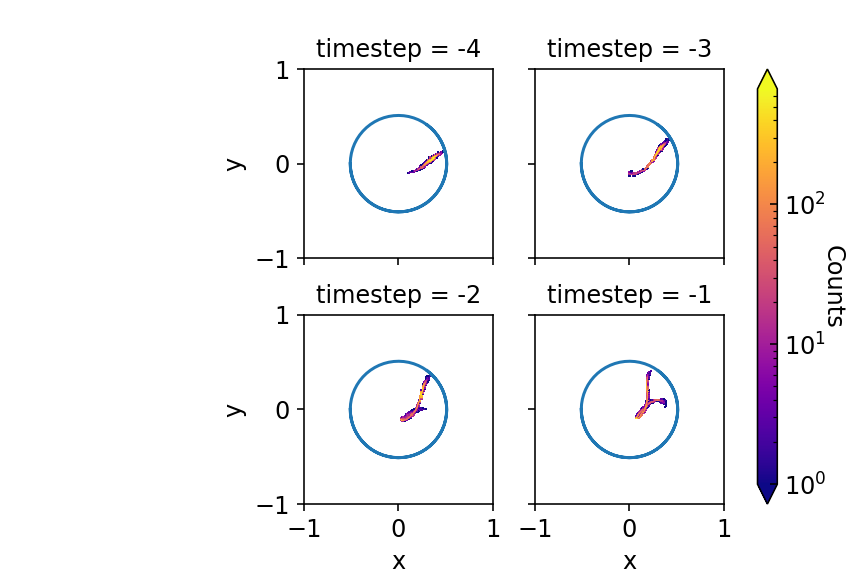

findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans.


In [4]:
%matplotlib notebook

x = x0
y = y0
z = cartcoord0[2,:,:]
xmin = -0.6
xmax = 0.6
ymin = -0.6
ymax = 0.6

##### Plot y vs x color coded by density #####

for i in range(len(x[:,0])):
    if (x[i,0]<xmin or x[i,0]>xmax or y[i,0]<ymin or y[i,0]>ymax):
        x[i,0]=float("NaN")
    is_nan = (x[:,0] != x[:,0])
    x = x[~is_nan]
    y = y[~is_nan]

nbins = 101
frames = nitir
normalize=colors.LogNorm()

fig, ax = plt.subplots(2,2,sharex=True, sharey=True)  #share x and y axes
fig.subplots_adjust(wspace=-0.4, hspace=0.3) #decrease the gaps between the subplots

def densityplot(timestep, array,rcircle,nrow,ncol,setcolorbar=False):
    statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(x[:,timestep], y[:,timestep], array, statistic='count', bins=nbins, range=[[xmin, xmax], [ymin, ymax]])

    x_width = (x_edges[1]-x_edges[0])
    x_centers = x_edges[1:]-x_width/2
    xi = x_centers
#     print('This is the shape of xi',np.shape(xi))

    y_width = (y_edges[1]-y_edges[0])
    y_centers = y_edges[1:]-y_width/2
    yi = y_centers

    ji = np.transpose(statistic) 

    ##### Place circle that is phi(t) on the plot #####
    
    mwp = MWPotential2014
    CRo = .5 # CRo = 4 kpc
    v_c = vcirc(mwp, R = CRo)# v_c in natural units and it's the v_c at corotation radius
    omegabo = v_c/CRo
#     print ('This is omegabo:',omegabo)

    t = np.linspace(0,200,100) #in Myr

    phit = np.pi + omegabo*(vo/ro)*t*(3.241*10**-17)*(3.15576*10**13) #omega* t is now unitless
    
    xcoord = rcircle*np.cos(phit)
#     print ('This is xcoord:',xcoord)
    ycoord = rcircle*np.sin(phit)
    
#     plt.gca().set_aspect('equal')
    
    # plt.plot(t,xcoord) # this makes a choppy sinusoidal function
    
    ax[nrow,ncol].plot(xcoord,ycoord)
    
    #####################################################################

    ##### set title, title size, and make tick marks point inward #####
    
    ax[nrow, ncol].set_title(r'timestep = ' +str(timestep))
    ax[nrow,ncol].title.set_size(12)
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    
    #####################################################################

    colormap = 'plasma' 
    # ax.set_aspect(1.)
    graph = ax[nrow,ncol].pcolormesh(xi, yi,ji, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
    
    ##### this will limit the number of colorbars that will appear in subplot #####
    if setcolorbar:
        cbar = plt.colorbar(graph,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
        cbar.set_label('Counts', rotation = 270,labelpad=9)
        
    #####################################################################
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()
    # cbar.mappable.set_clim(4,4.2)

    #####################################################################

    
for axs in ax.flat:
    axs.set(xlabel='x', ylabel='y', aspect=1)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()

densityplot(-4,y0i,0.51,0,0,setcolorbar=True)
densityplot(-3,y0i,0.51,0,1)
densityplot(-2,y0i,0.51,1,0)
densityplot(-1,y0i,0.51,1,1)

folder = 'Add Plummer Potential'

plt.savefig('/Users/oliviamcauley/Desktop/Cluster/Add Dehnen Bar/'+str(folder)+'/36-39.png')
plt.show()

In [ ]:
plt.close(fig)

In [ ]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import animation

# lon = np.linspace(120, 150, 31)
# lat = np.linspace(20, 50, 31)

# X, Y = np.meshgrid(lon, lat)

# lonc = 130
# latc = 25

# def cosbel(x, y, height = -1, radius = 5):
#     r = np.sqrt(x**2 + y**2)
#     z = 0.5 * height * (1 +np.cos(np.pi * r / radius))
#     z[r > radius] = 0
#     return z

# plt.rcParams['animation.html'] = 'html5'
# plt.rcParams['font.size'] = 18

# fig, ax = plt.subplots(figsize=(11,11))
# ax.set_aspect('equal')
# ax.set_xlim(120, 150)
# ax.set_ylim(20, 50)
# ti = ax.set_title("FT=0")

# lon0 = 130
# lat0 =  25
# p0 = 1000
# dp = 40

# Z = p0 + cosbel(X - lon0, Y - lat0, height=-dp)
# sc = ax.scatter(lonc, latc, c="white")
# pm = ax.pcolormesh(X, Y, Z, shading='gouraud')

# cbar = fig.colorbar(pm)
# cbar.set_clim(p0-dp, p0)
# cbar.set_ticks(np.linspace(p0-dp, p0, 11))
# cbar.set_label('slp hPa')

# def update(i):
#     lonc = lon0 + 0.03*i**2
#     latc = lat0 + i
#     Z = p0 + cosbel(X - lonc, Y - latc, height = -dp + 2 * i)
#     sc.set_offsets((lonc, latc))
#     pm.set_array(Z.ravel()) # convert array to 1d with ravel()
#     sc.set_zorder(1) # need to set drawing order with pcolormesh
#     pm.set_zorder(0)
#     ti.set_text("FT={}".format(i * 6))

# ani = animation.FuncAnimation(fig, update, frames=30)
# plt.close()
# ani

In [ ]:
# figure, axes = plt.subplots() 
# cc = plt.Circle(( 0.0 , 0.5102040816326531 ), 0.1 , alpha=0.1) 
# cc1 = plt.Circle(( 0.0 , -0.5102040816326531 ), 0.1 , alpha=0.1) 

# ax.set_aspect( 1 ) 
# ax.add_artist( cc ) 
# ax.add_artist( cc1 ) 

# plt.title( 'Colored Circle' )
# plt. ylim(-1,1)
# plt.xlim(-1,1)
# plt.show()

In [ ]:
##### Make a movie of the xy plot #####
# %matplotlib notebook

# from matplotlib.animation import FuncAnimation

# from random import randint

# data
# data_lst = [60, 59, 49, 51, 49, 52, 53]

# x = x0
# print ('This is x0 shape:', np.shape(x))
# y = y0

# # create the figure and axis objects
# fig, ax = plt.subplots()

# # plot the data and customize
# ax.plot(x,y)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# # ax.set_title('Temperature in Portland, OR over 7 days')

# # save and show the plot
# # fig.savefig('static_plot.png')
# plt.show()
    

# # create empty lists for the x and y data
# x = []
# y = []

# # create the figure and axes objects
# fig, ax = plt.subplots()

# # function that draws each frame of the animation
# def animate(i):
#     pt = randint(1,9) # grab a random integer to be the next y-value in the animation
#     x.append(i)
#     y.append(pt)

#     ax.clear()
#     ax.plot(x, y)
# #     ax.set_xlim([0,20])
# #     ax.set_ylim([0,10])
    
# # run the animation
# ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

# plt.show()


In [ ]:
# # %matplotlib notebook

# # fig, ax = plt.subplots()
# xdata, ydata = x0[0,:], y0[0,:]
# print ('This is shape of xdata:', np.shape(xdata))
# ln, = plt.plot([], [], 'ro')
# # ax.plot(xdata,ydata)

# # def init():
# #     ax.set_xlim(0, .5)
# #     ax.set_ylim(-.5, .5)
# #     return ln,
# time = nitir
# for i in range(time):
#     xdata = xdata[i+1]
# #     ydata = ydata[i+1]
# print ('This is shape of xdata', np.shape(xdata))

# # def update(time):
# #     for i in time:
# #         xdata[:,i] = xdata[:,i+1]
# #         print ('This is shape of xdata', xdata[:,i])
# #         ydata[:,i] = ydata[:,i+1]
# # #     xdata.append(time)
# # #     ydata.append(time)
# #     ln.set_data(xdata[:,i], ydata[:,i])
# #     return ln,

# # ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 30),
# #                     init_func=init, blit=True)
# # plt.show()

In [ ]:
# %matplotlib notebook

# TWOPI = 2*np.pi

# fig, ax = plt.subplots()

# t = np.arange(0.0, TWOPI, 0.001) #goes from 0 to 2pi 
# s = np.sin(t)
# l = plt.plot(t, s) # scatter(x[:,0], y[:,0])

# ax = plt.axis([0,TWOPI,-1,1])

# redDot, = plt.plot([0], [np.sin(0)], 'ro') #look up comma scatter(x[0,0],y[0,0])

# def animate(i):
#     redDot.set_data(i, np.sin(i)) #updating the position of the dot at time t scatter(x[0,i], y[0,i])
#     return redDot,

# # create animation using the animate() function
# myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \ #frames is array that is 0 to 29
#                                       interval=10, blit=True, repeat=True)#interval=1

# plt.show()

In [ ]:
# %matplotlib notebook

# # TWOPI = 2*np.pi
# ts = np.linspace(0,30)
# x = x0 # this array shpae is (10000,30)
# y = y0 # this array:(10000,30)

# fig, ax = plt.subplots()

# # plt.scatter(x[:,0], y[:,0])
# plt.scatter(x[:,:], y[:,:])


# # redDot, = plt.scatter(x[0,0],y[0,0], 'ro') #look up comma scatter(x[0,0],y[0,0])

# # t = np.arange(0.0, TWOPI, 0.001)
# # s = np.sin(t)
# # l = plt.plot(t, s)

# # ax = plt.axis([0,1,-1,1])
# # plt.scatter(x0,y0)
# redDot, = plt.plot([x[0,0]], [y[0,0]], 'ro')#ValueError: x and y can be no greater than 2-D, but have shapes (1, 10000, 30) and (1, 10000, 30)
# blueDot, = plt.plot([x[5000,0]], [y[5000,0]], 'yo')
# greenDot, = plt.plot(x[9999,0],y[9999,0], 'go')
# plt.xlabel('x (natural units)')
# plt.ylabel('y (natural units)')

# def animate(i):
#     redDot.set_data(x[0,i], y[0,i])
#     blueDot.set_data(x[5000,i], y[5000,i])
#     greenDot.set_data(x[9999,i],y[9999,i])
#     return redDot, blueDot, greenDot,

# # create animation using the animate() function
# myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0, 30), \
#                                       interval=1, blit=True, repeat=True)

# #blitbool, default: False
# #Whether blitting is used to optimize drawing. Note: when using blitting, 
# #    any animated artists will be drawn according to their zorder; however, 
# #    they will be drawn on top of any previous artists, regardless of their zorder.

# plt.show()

In [ ]:
# x = x0 # x position shape is: (10000,30)
# y = y0 # y position shape is: (10000,30) 

# # Scatter plot
# fig = plt.figure(figsize = (5,5))
# plt.xlim(-1,1)

# def ani(coords):
#      return plt.scatter([coords[0]],[coords[1]], color='g')

# def frames():
#     for xpos, ypos in zip(x, y):
#         yield xpos, ypos

# ani = FuncAnimation(fig, ani, frames=frames, interval=1000)

# plt.show()

# %matplotlib notebook

# x = x0 # x position shape is: (10000,30)
# y = y0 # y position shape is: (10000,30)
# # print(np.shape(x[:,0]))

# fig, ax = plt.subplots()

# # plt.scatter(x[:,0], y[:,0])
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # plotLine, = ax.plot(x[:,0], y[:,0])
# # plotLine = ax.scatter(x[:,0], y[:,0])

# plotTitle = ax.set_title("t=0")
# plt.xlim(-1,1)
# plt.ylim(-1,1)


# def animate(t):
# #     ax.clear()
#     plotLine = ax.scatter(x[:,t], y[:,t])
# #     plotLine.set_data(x[:,t], y[:,t])
#     plotTitle.set_text(f"t = {t:.1f}")
#     #ax.relim() # use if autoscale desired
#     #ax.autoscale()
# #     return [plotLine,plotTitle]
# #     return [plotLine,]
#     return plotLine

# ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,30), blit=True)
# plt.show()


# def main():
#     numframes = 100
#     numpoints = 10
#     color_data = np.random.random((numframes, numpoints))
#     x, y, c = np.random.random((3, numpoints))

#     fig = plt.figure()
#     scat = plt.scatter(x, y, c=c, s=100)

#     ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
#                                   fargs=(color_data, scat))
#     plt.show()

# def update_plot(i, data, scat):
#     scat.set_array(data[i])
#     return scat,

# main()



In [ ]:
plt.figure()
plt.scatter (x0i*ro, y0i*ro, linestyle=':')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.ylabel('y (kpc)')
plt.xlabel('x (kpc)')
plt.show()

plt.figure()
plt.scatter (x0i, y0i, linestyle=':')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.ylabel('y (natural units)')
plt.xlabel('x (kpc)')
plt.show()

# plt.figure()
# plt.scatter (x0i*ro, z0i*ro, linestyle=':')
# # plt.xlim(-10,10)
# # plt.ylim(-10,10)
# plt.ylabel('z (kpc)')
# plt.xlabel('x (kpc)')
# plt.show()

In [ ]:
##### Plot position after integration #####
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(ro*x0f, ro*y0f, linestyle=':')
# ax.set_aspect(1)
# plt.gca().set_aspect('equal')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.ylabel('$y_{f}$ (kpc)')
plt.xlabel('$x_{f}$ (kpc)')

##### fix aspect ratio of plot to be a square #####

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

#######################################################
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.scatter (ro*x0f, ro*z0f, linestyle=':')
# # ax.set_aspect(10)
# # plt.xlim(-10,10)
# # plt.ylim(-10,10)
# plt.ylabel('$z_{f}$ (kpc)')
# plt.xlabel('$x_{f}$ (kpc)')
# plt.show()

In [ ]:
##### Plot position after integration #####
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x0f, y0f, linestyle=':')
# ax.set_aspect(1)
# plt.gca().set_aspect('equal')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.ylabel('$y_{f}$ (natural units)')
plt.xlabel('$x_{f}$ (natural units)')

##### fix aspect ratio of plot to be a square #####

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

#######################################################
plt.show()

In [ ]:
##### Plot position after integration #####
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x0, y0, linestyle=':')
# ax.set_aspect(1)
# plt.gca().set_aspect('equal')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.ylabel('$y_{f}$ (natural units)')
plt.xlabel('$x_{f}$ (natural units)')

##### fix aspect ratio of plot to be a square #####

ratio = 1.0
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

#######################################################
plt.show()

In [ ]:
plt.figure()
plt.scatter (ro*r0f,ro*z0f, linestyle=':')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.ylabel('$z_{f} (kpc)$')
plt.xlabel('$R_{f} (kpc)$')
plt.show()

#switch to density plots so we can see where stars are in cluster. Include potential we used for cluster

In [ ]:
plt.figure()
plt.scatter (vo*vx0i, vo*vy0i, linestyle=':')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.ylabel('$v_{y}$ (km/s) ')
plt.xlabel('$v_{x}$ (km/s) ')
plt.show()

plt.figure()
plt.scatter (vo*vr0i, vo*vphii, linestyle=':')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.ylabel('$v_{\phi_o}$ (km/s) ')
plt.xlabel('$v_{r_o}$ (km/s) ')
plt.show()

# plt.figure()
# plt.scatter (vphii, vphif, linestyle=':')
# # plt.xlim(-10,10)
# # plt.ylim(-10,10)
# plt.ylabel('vphi final ')
# plt.xlabel('vphi initial ')
# plt.show()

# plt.figure()
# plt.scatter (vz0i, vz0f, linestyle=':')
# # plt.xlim(-10,10)
# # plt.ylim(-10,10)
# plt.ylabel('vz final ')
# plt.xlabel('vz initial ')
# plt.show()

In [ ]:
##### Test to see if there are any major outliers #####

testlenjrf = 0
testlenjri = 0

print('This is length of jri',len(jri))

for count in range(0,len(jri)):
    if jrf[count] > 2000:
        testlenjrf = testlenjrf + 1
    if jri[count] > 2000:
        testlenjri = testlenjri + 1
print('This is testlenjri',testlenjri)
print('This is testlenjrf',testlenjrf)


In [ ]:
print(jrf)
print(jri[500])

In [ ]:
##### Plot Radial action of the Quiet run #####

plt.figure()

# line = np.linspace(0,.15)
line = np.linspace(0,1.5)

plt.scatter(ro*vo*jri,ro*vo*jrf,linestyle = ':')
# plt.plot(line,line,'orange',label='Slope = 1')
# plt.title('Final vs Initial Radial Action')
plt.xlabel('$J_{R_0}$ (kpc km/s)')
plt.ylabel('$J_{R_f}$ (kpc km/s)')
# plt.xlim(.005,.008)
# plt.ylim(.005,.008)
# plt.legend()
plt.show()

In [ ]:
plt.figure()

# line = np.linspace(700,900)
# line = np.linspace(0,1.5)


plt.scatter(ro*vo*jphii,ro*vo*jphif,linestyle = ':')
# plt.plot(line,line,'orange',label='Slope = 1')
# plt.title('Final vs Initial Radial Action')
plt.xlabel('$J_{\phi_0}$ (kpc km/s)')
plt.ylabel('$J_{\phi_f}$ (kpc km/s)')
# plt.xlim(-.950,-.750)
# plt.ylim(-.950,-.750)
# plt.legend()
plt.show()

In [ ]:
plt.figure()

# line = np.linspace(0,.15)
# line = np.linspace(0,1.5)


plt.scatter(ro*vo*jzi,ro*vo*jzf,linestyle = ':')
# plt.plot(line,line,'orange',label='Slope = 1')
# plt.title('Final vs Initial Radial Action')
plt.xlabel('$J_{z_0}$ (kpc km/s)')
plt.ylabel('$J_{z_f}$ (kpc km/s)')
# plt.xlim(-.0005,5000)
# plt.ylim(0,5000)
# plt.legend()
plt.show()

In [ ]:
def getJRfromJacobienergy(m,CRo):
    
    mwp = MWPotential2014
    pot = mwp

#     m = 4
    ro = 8
    vo = 220
    v_c = vcirc(mwp, R = CRo)
    omegabo = v_c/CRo

    OUHR = lindbladR(Pot=pot, OmegaP=omegabo, m=-m, ro=ro,vo=vo) # m being negative makes this an OLR; in physical units
    IUHR = lindbladR(Pot=pot, OmegaP=omegabo, m=m, ro=ro,vo=vo) #lindbladR must have ro and vo in order to solve tuple problem
    CR = lindbladR(Pot=pot, OmegaP=omegabo, m='corotation', ro=ro,vo=vo)

    pot_IUHR = evaluatePotentials(mwp, IUHR, z=0, phi=0, ro=ro,vo=vo)
    pot_OUHR = evaluatePotentials(mwp, OUHR, z=0, phi=0, ro=ro,vo=vo)
    pot_CR = evaluatePotentials(mwp, CR, z=0, phi=0, ro=ro,vo=vo)

#     print ('This is evaluatepotential for ILR:',pot_ILR)
#     print ('\nThis is evaluatepotential for OLR:',pot_OLR)
#     print ('\nThis is evaluatepotential for CR:',pot_CR)

    # print ('This is mwp:',mwp)
    kappa_IUHR = epifreq(pot,R=IUHR/ro,ro=ro,vo=vo)
#     print ('\nThis is kappa_ILR:',kappa_ILR)

    kappa_OUHR = epifreq(pot,R=OUHR/ro,ro=ro,vo=vo)
#     print('\nThis is kappa_OLR:',kappa_OLR)

    kappa_CR = epifreq(pot,R=CR/ro,ro=ro,vo=vo)
#     print('\nThis is kappa_CR:',kappa_CR)

    OmegaP = omegabo*(vo/ro) #pattern speed at corotation
#     print ('\nThis is OmegaP:',OmegaP)

    v_c_IUHR = vcirc(mwp, R = IUHR/ro, ro = ro, vo = vo) #in physical units
    OmegaP_IUHR = v_c_IUHR/IUHR

    v_c_OUHR = vcirc(mwp, R = OUHR/ro, ro = ro, vo = vo) #in physical units
    OmegaP_OUHR = v_c_OUHR/OUHR

    E_c_IUHR = pot_IUHR + (1/2)*vcirc(mwp,R=IUHR/ro,ro=ro,vo=vo)**2
    E_c_OUHR = pot_OUHR + (1/2)*vcirc(mwp,R=OUHR/ro,ro=ro,vo=vo)**2
    E_c_CR = pot_CR + (1/2)*vcirc(mwp,R=CR/ro,ro=ro,vo=vo)**2

#     print('\nThis is KE:', vcirc(mwp,R=ILR/ro,ro=ro,vo=vo)**2)
#     print ('\nThis is circular energy for ILR',E_c_ILR)
#     print ('\nThis is circular energy for OLR',E_c_OLR)
#     print ('\nThis is circular energy for CR',E_c_CR)

    # E_J_ILR = E_c_ILR - OmegaP*ILR*vcirc(mwp,R=ILR/ro,ro=ro,vo=vo)
    # print ('\nThis is Jacobi Integral of ILR', E_J_ILR)

    # E_J_OLR = E_c_OLR - OmegaP*OLR*vcirc(mwp,R=OLR/ro,ro=ro,vo=vo)
    # print ('\nThis is Jacobi Integral of OLR', E_J_OLR)

    # E_J_CR = E_c_CR - OmegaP*CR*vcirc(mwp,R=CR/ro,ro=ro,vo=vo)
    # print ('\nThis is Jacobi Integral of CR', E_J_CR)

    ##### Find y-intercept: J_R = ((E_J(J_R=0) - E_c)/kappa) + (OmegaP/kappa)*Lz #####
    ##### This formula has the form of y = b + m*x 
    ##### (E_J(J_R=0) - E_c)/kappa = (pot +(1/2)*vcirc**2 - OmegaP*Lz - pot - (1/2)*vcirc**2)/kappa 
    #####                          = -OmegaP*Lz/kappa 
    #####                          = -OmegaP*R_g*vcirc/kappa

    y_intercept_IUHR = OmegaP*IUHR*vcirc(mwp,R=IUHR/ro,ro=ro,vo=vo)/kappa_IUHR
    y_intercept_OUHR = OmegaP*OUHR*vcirc(mwp,R=OUHR/ro,ro=ro,vo=vo)/kappa_OUHR
    y_intercept_CR = OmegaP*CR*vcirc(mwp,R=CR/ro,ro=ro,vo=vo)/kappa_CR

#     print ('\nThis is the y intercept when R = ILR', y_intercept_ILR) 
#     print ('\nThis is the y intercept when R = OLR', y_intercept_OLR) 
#     print ('\nThis is the y intercept when R = CR', y_intercept_CR) 
    ####################################################################################

    Lz = np.linspace(0,2600)

    J_R_IUHR = -y_intercept_IUHR + (OmegaP*Lz)/kappa_IUHR
    J_R_OUHR = -y_intercept_OUHR + (OmegaP*Lz)/kappa_OUHR
    J_R_CR = -y_intercept_CR + (OmegaP*Lz)/kappa_CR

    # plt.plot(Lz,J_R_ILR)
    # plt.plot(Lz,J_R_OLR)
    # plt.plot(Lz,J_R_CR)
    # plt.xlabel('$L_{z}$')
    # plt.ylabel('$J_{R}$')
    
    return J_R_IUHR, J_R_OUHR, J_R_CR

getJRfromJacobienergy(4,CRo=5./6)[0] # This outputs J_R_IUHR
# getJRfromJacobienergy(4)[1] # This outputs J_R_OUHR
# getJRfromJacobienergy(4)[2] # This outputs J_R_CR

In [ ]:
def getactiongraph(nbins, colormap, normalize, CRo, m, jphi, jphi_quiet, jr, jr_quiet, cbarlabel_deltajphi, cbarlabel_deltajr, xaxislabel, yaxislabel,vlinelabelILR,vlinelabelOLR):    
    normalize = normalize
    colormap = colormap
    ##### convert to physical units #####
    ro = 8 #units: kpc
    vo = 220 #units: km/s
    # normalize = colors.LogNorm()
    #####################################

    ##### parameters for potentials #####
    # Set up the Dehnen bar potential
    mwp = MWPotential2014
    v_c = vcirc(mwp, R = CRo) # v_c in natural units and it's the v_c at corotation radius
    omegabo = v_c/CRo # Pattern speed based on CR #orbital freq = v_c/R : we need to figure out v_c at CR
    #####################################

    pot = mwp

    # m might be = 4 instead of 2
    OLR = lindbladR(Pot=pot, OmegaP=omegabo, m=-m, ro=ro,vo=vo) # m being negative makes this an OLR; in physical units
    ILR = lindbladR(Pot=pot, OmegaP=omegabo, m=m, ro=ro,vo=vo) #lindbladR must have ro and vo in order to solve tuple problem
    CR = lindbladR(Pot=pot, OmegaP=omegabo, m='corotation', ro=ro,vo=vo) #m=2 is LR and m=4 is Ultraharmonic LR

    ##### Want corotation radius for the action angle plot #####
#     print ('This is OLR:',OLR)
#     print ('\nThis is ILR:',ILR)
#     print ('\nThis is CR:',CR)

#     print ('\nThis is OLR*vcirc*vo:',OLR*vcirc(mwp,R=OLR)*vo) #want vc at OLR,ILR
#     print ('\nThis is ILR*vcirc*vo:',ILR*vcirc(mwp,R=ILR)*vo)
#     print ('\nThis is CR*v_c*vo:',CR*v_c*vo)
    ############################################################

    Lz = np.linspace(0,2600)
    
    delta_jphi = jphi - jphi_quiet 
    delta_jr = jr - jr_quiet

    jphimax = jphi_quiet.max()
    jphimin = jphi_quiet.min()
    jrmin = jr_quiet.min()
    jrmax = jr_quiet.max()
    delta_jphimin = delta_jphi.min()
    delta_jphimax = delta_jphi.max()

    for i in range(len(jphi)):
        if (jphi_quiet[i]<jphimin or jphi_quiet[i]>jphimax or jr_quiet[i]<jrmin or jr_quiet[i]>jrmax or delta_jphi[i]<delta_jphimin or delta_jphi[i]>delta_jphimax):
            jphi[i]=float("NaN")
        is_nan = (jphi[:] != jphi[:])
        jphi = jphi[~is_nan]
        jr = jr[~is_nan]
        delta_jphi = delta_jphi[~is_nan]

    statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(jphi_quiet*ro*vo, jr_quiet*ro*vo, delta_jphi*ro*vo, statistic='mean', bins=nbins)
    statistic1, x_edges, y_edges, binnumber = stats.binned_statistic_2d(jphi_quiet*ro*vo, jr_quiet*ro*vo, delta_jr*ro*vo, statistic='mean', bins=nbins)

    x_width = (x_edges[1]-x_edges[0])
    x_centers = x_edges[1:]-x_width/2
    xi = x_centers

    y_width = (y_edges[1]-y_edges[0])
    y_centers = y_edges[1:]-y_width/2
    yi = y_centers

    ji = np.transpose(statistic)
    ji1 = np.transpose(statistic1)

    # add Lindblad resonances to plots (also vertical lindblad resonances-instead of using kappa use vertical freq)
    
    ##### Plot Jr vs Jphi color coded by delta Jphi #####
    fig, ax = plt.subplots()
    # ax.set_aspect(1.)
    change_j = ax.pcolormesh(xi, yi,ji, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
    cbar = plt.colorbar(change_j,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
    cbar.set_label(cbarlabel_deltajphi, rotation = 270,labelpad=30)
#     cbar.mappable.set_clim(-75,75)
    
#     plt.title(''+str(m)+' : 1')
    plt.xlabel(xaxislabel)
#     plt.axvline(CRo*v_c*vo,linestyle='-',label='Corotation',color='hotpink')
#     # m = +/- 2 will make vlinelabelILR/OLR be ILR/OLR and m= +/- 4 to be UILR/UOLR
#     plt.axvline(ILR*vcirc(mwp,R=ILR/ro)*vo,linestyle='-',label=vlinelabelILR,color='darkorange') 
#     plt.axvline(OLR*vcirc(mwp,R=OLR/ro)*vo,linestyle='-',label=vlinelabelOLR,color='red')
    plt.ylabel(yaxislabel) #units: root Jr which will change shape into V
    # plt.xlim(0,1400,400) #play around with max and min
    # plt.ylim(0,400,50)
#     plt.legend(fontsize=10)
#     plt.legend(bbox_to_anchor=(1.25,1.),loc='upper left')
    plt.show()
    #####################################################
    
    ##### Plot Jr vs Jphi color coded by delta Jr #####
#     fig, ax = plt.subplots()
#     change_j = ax.pcolormesh(xi, yi,ji1, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
#     cbar = plt.colorbar(change_j,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
#     cbar.set_label(cbarlabel_deltajr, rotation = 270,labelpad=30)
#     cbar.mappable.set_clim(25,125)
    
#     plt.title(''+str(m)+' : 1')
#     plt.xlabel(xaxislabel)
#     plt.ylabel(yaxislabel) #units: root Jr which will change shape into V

#     plt.axvline(CR*v_c*vo,linestyle='-',label='Corotation',color='hotpink')
    ##### m = +/- 2 will make vlinelabelILR/OLR be ILR/OLR and m= +/- 4 to be UILR/UOLR
#     plt.axvline(ILR*vcirc(mwp,R=ILR/ro)*vo,linestyle='-',label=vlinelabelILR,color='darkorange') 
#     plt.axvline(OLR*vcirc(mwp,R=OLR/ro)*vo,linestyle='-',label=vlinelabelOLR,color='red')
    
#     plt.plot(Lz,-getJRfromJacobienergy(m)[0],color='black',ls='-',label='ILR')
#     plt.plot(Lz,-getJRfromJacobienergy(m)[1],color='black',ls=':',label='OLR')
#     plt.plot(Lz,-getJRfromJacobienergy(m)[2],color='black',ls=':-',label='CR')
    
#     plt.plot(Lz,-getJRfromJacobienergy(m,CRo)[0],color='black',ls='--',label=''+str(m)+':1')
#     plt.plot(Lz,-getJRfromJacobienergy(m,CRo)[1],color='black',ls='--')#,label='OLR')
#     plt.plot(Lz,-getJRfromJacobienergy(m,CRo)[2],color='black',ls='-',label='1:1')
    
#     plt.legend(fontsize=10)
#     plt.legend(bbox_to_anchor=(1.25,1.),loc='upper left')
    
#     plt.ylim(0,450)
    
#     plt.show()
    
getactiongraph(nbins=101, colormap='BuPu', normalize=colors.Normalize(), CRo=.5, m=4, jphi=jphif, jphi_quiet=jphii, jr=jrf, jr_quiet=jri,cbarlabel_deltajphi='$\Delta\ J_{\phi_{10}}$', cbarlabel_deltajr='$\Delta\ J_{r_{10}}$', xaxislabel='$J_{\phi_{o}}$ (kpc km/s)',yaxislabel='$J_{r_{o}}$ (kpc km/s)', vlinelabelILR='ILR', vlinelabelOLR='OLR')    


In [ ]:
z0imin = z0i.min()
z0imax = z0i.max()
r0imin = r0i.min()
r0imax = r0i.max()

# for i in range(len(sx)):
#         if (sx[i]<sxmin or sx[i]>sxmax or sy[i]<symin or sy[i]>symax): # or sv[i]<svmin or sv[i]>svmax):
#             sx[i]=float("NaN")
#     is_nan = (sx[:] != sx[:])
#     sx = sx[~is_nan]
#     sy = sy[~is_nan]
#     sj = sj[~is_nan]

for i in range(len(z0i)):
    if (z0i[i]<z0imin or z0i[i]>z0imax or r0i[i]<r0imin or r0i[i]>r0imax):
        z0i[i]=float("NaN")
    is_nan = (z0i[:] != z0i[:])
    z0i = z0i[~is_nan]
    r0i = r0i[~is_nan]

nbins = 101
normalize=colors.Normalize()

delta_r = r0f-r0i

statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(r0i*ro, z0i*ro, delta_r*ro, statistic='mean', bins=nbins)

x_width = (x_edges[1]-x_edges[0])
x_centers = x_edges[1:]-x_width/2
xi = x_centers

y_width = (y_edges[1]-y_edges[0])
y_centers = y_edges[1:]-y_width/2
yi = y_centers

ji = np.transpose(statistic)

##### Plot z vs R color coded by R #####
fig, ax = plt.subplots()
colormap = 'BuPu'
# ax.set_aspect(1.)
zrgraph = ax.pcolormesh(xi, yi,ji, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
cbar = plt.colorbar(zrgraph,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
cbar.set_label('$\Delta$R (kpc)', rotation = 270,labelpad=30)
plt.xlabel('$R_{0}$ (kpc)') #initial radius
plt.ylabel('$z_{0}$ (kpc)') #initial height
# cbar.mappable.set_clim(-150,150)

In [ ]:
z0fmin = z0f.min()
z0fmax = z0f.max()
r0fmin = r0f.min()
r0fmax = r0f.max()

# for i in range(len(sx)):
#         if (sx[i]<sxmin or sx[i]>sxmax or sy[i]<symin or sy[i]>symax): # or sv[i]<svmin or sv[i]>svmax):
#             sx[i]=float("NaN")
#     is_nan = (sx[:] != sx[:])
#     sx = sx[~is_nan]
#     sy = sy[~is_nan]
#     sj = sj[~is_nan]

for i in range(len(z0f)):
    if (z0f[i]<z0fmin or z0f[i]>z0fmax or r0f[i]<r0fmin or r0f[i]>r0fmax):
        z0f[i]=float("NaN")
    is_nan = (z0f[:] != z0f[:])
    z0f = z0f[~is_nan]
    r0f = r0f[~is_nan]

nbins = 101
normalize=colors.Normalize()

statistic, x_edges, y_edges, binnumber = stats.binned_statistic_2d(r0f*ro, z0f*ro, z0f*ro, statistic='mean', bins=nbins)

x_width = (x_edges[1]-x_edges[0])
x_centers = x_edges[1:]-x_width/2
xi = x_centers

y_width = (y_edges[1]-y_edges[0])
y_centers = y_edges[1:]-y_width/2
yi = y_centers

ji = np.transpose(statistic)

##### Plot z vs R color coded by R #####
fig, ax = plt.subplots()
colormap = 'coolwarm'
# ax.set_aspect(1.)
zrgraph = ax.pcolormesh(xi, yi,ji, cmap = colormap, norm=normalize) #let's look at it in logarithmic map
cbar = plt.colorbar(zrgraph,ax=ax,fraction=0.03,extend='both') #both caps it at clim, but it can go further than that limit
cbar.set_label('$z_{f}$', rotation = 270,labelpad=5)
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
# cbar.mappable.set_clim(6.6,6.7)